<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Classification</strong> Find what class a sample belongs to.
</div>

# Multi-Layer Perceptron Classification

## Overview

- [Description](#Description)  
    - [Algorithms](#Algorithms)
    - [Complexity](#Complexity)
    - [Mathematical Formulation](#Mathematical-Formulation)
- [Multi-Layer Perceptron](#Multi-Layer-Perceptron)
- [EXAMPLE - Decision Boundaries Visualization](#EXAMPLE---Decision-Boundaries-Visualization)

## Description

**Multi-layer Perceptron (MLP)** is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where m is the number of dimensions for input and o is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output. 

<img src="images/multilayerperceptron_network.png" width="40%">

The leftmost layer, known as the input layer, consists of a set of neurons $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features. Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

The **advantages** of Multi-layer Perceptron are:

- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using partial_fit.

The **disadvantages** of Multi-layer Perceptron (MLP) include:

- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

### Algorithms

**Stochastic Gradient Descent** - Updates parameters using the gradient of the loss function respect to a parameter that needs adaptation.

**Adam** - is similar to SGD in a sense that is a stochastic optimizer, but it can automatically adjust the amount to update parameters based on adaptive estimates of lower-order moments.  

**L-BFGS** - is a solver that approximates the Hessian matrix which represents the second-order partial derivative of a function. Further it approximates the inverse of the Hessian matrix to perform parameter updates.

With SGD or Adam, training supports online and mini-batch learning

### Complexity

Suppose there are:

- n training samples
- m features
- k hidden layers, each containing h neurons - for simplicity
- o output neurons. 

The time complexity of backpropagation is $O(n \cdot m \cdot h^k \cdot o \cdot i)$, where $i$ is the number of iterations. Since backpropagation has a high time complexity, it is advisable to start with smaller number of hidden neurons and few hidden layers for training.

### Mathematical Formulation

Given a set of training examples $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$ where $x_i \in \mathbf{R}^n$ and $y_i \in \{0, 1\}$, a one hidden layer one hidden neuron MLP learns the function $f(x) = W_2 g(W_1^T x + b_1) + b_2$ where $W_1 \in \mathbf{R}^m$ and $W_2, b_1, b_2 \in \mathbf{R}$ are model parameters. $W_1, W_2$ represent the weights of the input layer and hidden layer, resepctively; and $b_1, b_2$ represent the bias added to the hidden layer and the output layer, respectively. $g(\cdot) : R \rightarrow R$ is the activation function, set by default as the hyperbolic tan. It is given as,  

$$g(z)= \frac{e^z-e^{-z}}{e^z+e^{-z}}$$  

For binary classification, $f(x)$ passes through the logistic function $g(z)=1/(1+e^{-z})$ to obtain output values between zero and one. A threshold, set to 0.5, would assign samples of outputs larger or equal 0.5 to the positive class, and the rest to the negative class.
If there are more than two classes, $f(x)$ itself would be a vector of size (n_classes). Instead of passing through logistic function, it passes through the softmax function, which is written as,  

$$\text{softmax}(z)_i = \frac{e^{z_i}}{\sum_{l=1}^k e^{z_l}}$$  

where $z_i$ represents the $i$th element of the input to softmax, which corresponds to class $i$, and $k$ is the number of classes. The result is a vector containing the probabilities that sample x belong to each class. The output is the class with the highest probability.  

MLP uses different loss functions depending on the problem type. The loss function for classification is Cross-Entropy, which in binary case is given as,  

$$Loss(\hat{y},y,W) = -y \ln {\hat{y}} - (1-y) \ln{(1-\hat{y})} + \alpha ||W||_2^2$$  

where $\alpha ||W||_2^2$ is an L2-regularization term (aka penalty) that penalizes complex models; and $\alpha > 0$ is a non-negative hyperparameter that controls the magnitude of the penalty. 

Starting from initial random weights, multi-layer perceptron (MLP) minimizes the loss function by repeatedly updating these weights. After computing the loss, a backward pass propagates it from the output layer to the previous layers, providing each weight parameter with an update value meant to decrease the loss.  

In gradient descent, the gradient $\nabla Loss_{W}$ of the loss with respect to the weights is computed and deducted from $W$. More formally, this is expressed as,  

$$W^{i+1} = W^i - \epsilon \nabla {Loss}_{W}^{i}$$  

where $i$ is the iteration step, and $\epsilon$ is the learning rate with a value larger than 0.
The algorithm stops when it reaches a preset maximum number of iterations; or when the improvement in loss is below a certain, small number.

## Multi-Layer Perceptron

[Multi-Layer Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) implements a multi-layer perceptron (MLP) for classification that trains using **backpropagation**. More precisely, it trains using some form of gradient descent and the gradients are calculated using backpropagation. In this case, for classification, it minimizes the [Cross-Entropy](http://www.cse.unsw.edu.au/~billw/cs9444/crossentropy.html) loss function, giving a vector of probability estimates $P(y|x)$ per sample $x$.

Some features:

- It supports multi-class classification by applying [Softmax](https://en.wikipedia.org/wiki/Softmax_function) as the output function.
- It uses parameter $\alpha$ for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes.
- It is sensitive to **feature scaling**

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>MLPClassifier</strong> (hidden_layer_sizes(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
<br/>
Parameters:
<ul>
<li>hidden_layer_sizes: tuple that represents the number of neurons of each layer</li>
<li>activation: activation function for the hidden layer (identity, logistic, tanh or relu)</li>
<li>solver: the solver for weight optimization (sgd, adam, lbfgs)</li>
<li>alpha: L2 penalty (regularization term)</li>
<li>batch_size: size of minibatches for stochastic optimizers</li>
<li>learning_rate: learning rate schedule for weight updates (constant, invscaling, adaptive)</li>
<li>learning_rate_init: learning rate init value</li>
</ul>
</div>

In [1]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['legend.fontsize'] = 10

In [2]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

dataset = load_iris()
print(dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [6]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler(with_mean=True, with_std=True)
sd.fit(X_train)

X_train_std = sd.transform(X_train)
X_test_std = sd.transform(X_test)

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(3,), max_iter=10000)
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
mlp.classes_

array([0, 1, 2])

In [9]:
mlp.coefs_

[array([[-1.11376295,  0.17250724,  0.37806131],
        [ 1.36230045, -0.13564541, -0.12045834],
        [-1.69347775, -0.99926693,  0.00489508],
        [-2.14620908, -1.11093516, -0.56601257]]),
 array([[ 0.83695663, -2.27320603, -1.30492905],
        [-1.55823424,  2.00561949, -1.27922066],
        [-0.34748123, -0.21310266,  0.46627449]])]

In [10]:
mlp.intercepts_

[array([ 0.71344321,  2.05051409, -0.43014633]),
 array([-1.54232512, -1.42787628,  1.21900566])]

In [11]:
mlp.loss_curve_

[1.4494168050980285,
 1.4466191726535529,
 1.4438483768127139,
 1.4410834487333708,
 1.4383417568492194,
 1.4356178733778044,
 1.4329091453670137,
 1.4302125565640651,
 1.4275282332801238,
 1.4248585191767627,
 1.4222177538731251,
 1.4195911588059651,
 1.416986199927154,
 1.4143940036790486,
 1.4118183859512108,
 1.4092693197199304,
 1.4067354126131641,
 1.4042197424781704,
 1.401722852808853,
 1.3992485044291758,
 1.3967901402803529,
 1.3943445574050481,
 1.3919114701478512,
 1.3894906172824659,
 1.3870867289696434,
 1.3847024707689835,
 1.3823302657872487,
 1.3799698286037207,
 1.3776195155393436,
 1.3752793370271175,
 1.3729498431487024,
 1.3706356383965896,
 1.3683357546371628,
 1.3660563469255622,
 1.3637956758954517,
 1.3615479844329206,
 1.3593107048155262,
 1.3570834990044212,
 1.3548679444921676,
 1.3526691947961749,
 1.3504856108333299,
 1.3483114862772205,
 1.346151800589271,
 1.344002187328085,
 1.3418617142310347,
 1.3397359523906951,
 1.3376187085365945,
 1.33550971541928

In [12]:
mlp.n_iter_

3164

In [13]:
mlp.best_loss_

0.10851252978799686

In [14]:
print('Accuracy: {0}'.format(mlp.score(X_test_std, y_test)))
y_pred = mlp.predict(X_test_std)
print('Number of milabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.911111111111
Number of milabeled points: 4


## EXAMPLE - Decision Boundaries Visualization

For visualization purposes we will choose two features: petal widh and petal length

In [15]:
from modules import plot_decision_regions

X = df.drop(labels=['class','sepal length (cm)', 'sepal width (cm)'], axis=1)
y = df['class']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Accuracy: 0.911111111111
Number of mislabeled points: 4


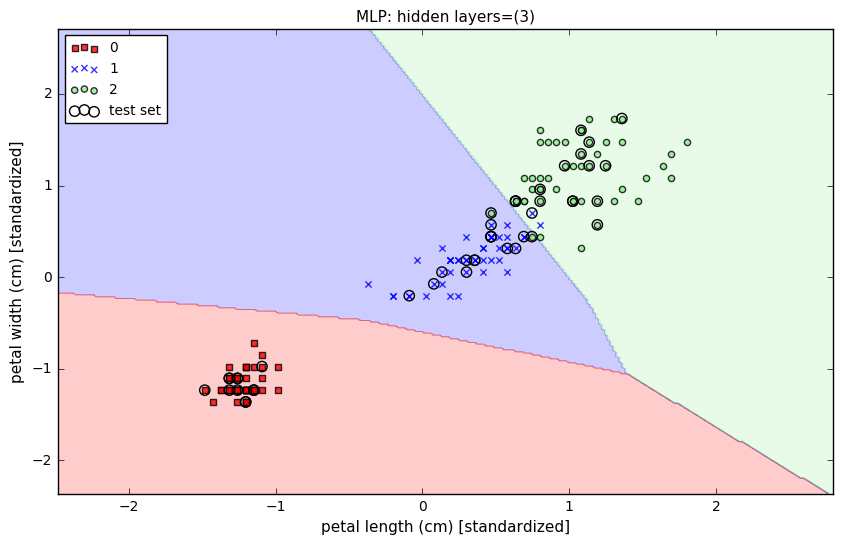

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(3,), max_iter=10000)
mlp.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, X_test_std, y_train, y_test, classifier=mlp, test_marker=True)
plt.title('MLP: hidden layers=(3)')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')

Accuracy: 0.911111111111
Number of mislabeled points: 4


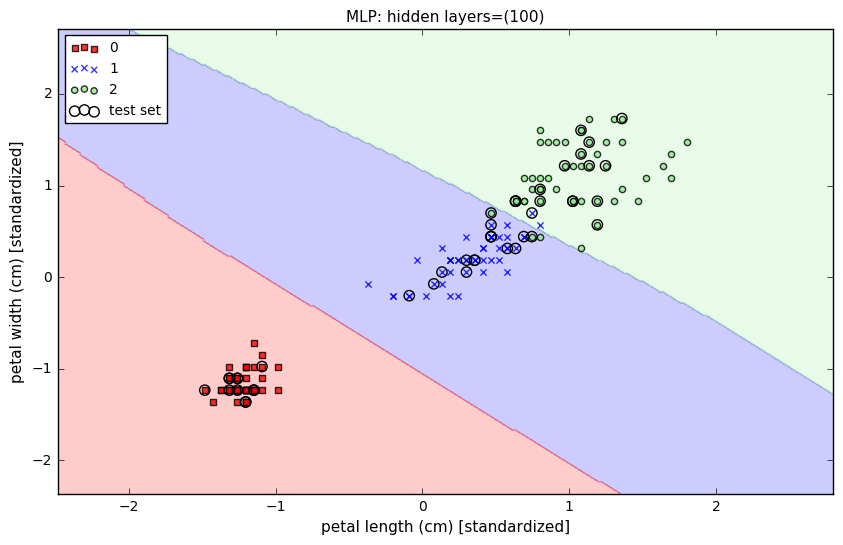

In [17]:
mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, X_test_std, y_train, y_test, classifier=mlp, test_marker=True)
plt.title('MLP: hidden layers=(100)')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')

Accuracy: 0.911111111111
Number of mislabeled points: 4


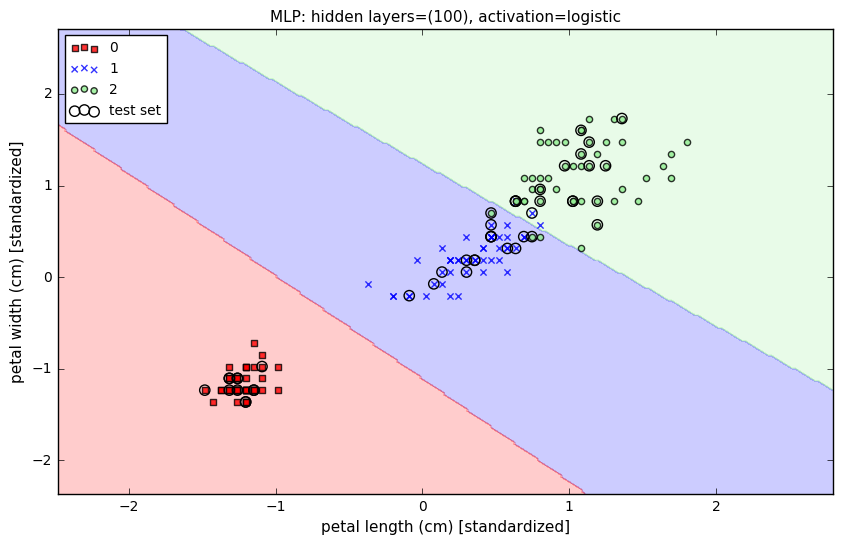

In [20]:
mlp = MLPClassifier(activation='logistic', max_iter=10000)
mlp.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, X_test_std, y_train, y_test, classifier=mlp, test_marker=True)
plt.title('MLP: hidden layers=(100), activation=logistic')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')